<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-08-05-tree-based-models-bagging-grf-instrumental-forest-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)


# 2.8.5 Instrumental Forest

An **Instrumental Forest** is a machine learning method, specifically an extension of the Generalized Random Forests (GRF) framework, used to estimate **conditional local average treatment effects (LATE)** in observational data studies or experiments with imperfect compliance. It combines the principles of instrumental variable (IV) analysis with random forest techniques to address issues of endogeneity and heterogeneity in treatment effects. It is particularly useful in causal inference for estimating how a treatment impacts an outcome when influenced by an instrument, accounting for confounding variables.

## Overview

An Instrumental Forest is designed to estimate treatment effects using an **instrumental variable (Z)**, which is a variable that affects the treatment assignment (W) but does not directly affect the outcome (Y) except through the treatment. The forest estimates the conditional local average treatment effect, denoted as **τ(X)**, which represents the treatment effect for specific covariate values (X). Formally, it estimates:

$$ τ(X) = \frac{Cov[Y, Z | X = x]}{ Cov[W, Z | X = x]} $$

Where:

-   $Y$: Outcome variable (e.g., health outcome, sales, etc.).
-   $W$: Treatment assignment (e.g., whether a patient received a drug).
-   $Z$ Instrument (e.g., a randomized encouragement to take the drug).
-   $X$: Covariates (e.g., patient characteristics like age, gender).
-   $Cov[Y, Z | X = x]$: Covariance between the outcome and instrument given covariates.
-   $Cov[W, Z | X = x]$: Covariance between the treatment and instrument given covariates.

When the instrument $Z$ and treatment $W$ are the same, the Instrumental Forest reduces to a Causal Forest, a related method for estimating causal effects without instruments.



### Instrumental variable (IV)

An **instrumental variable (IV)** is a tool used in statistics and econometrics to estimate causal relationships when a randomized controlled trial is not feasible, or when there is concern about endogeneity—i.e., when the treatment or exposure variable is correlated with unobserved factors that also affect the outcome. IV methods help isolate the causal effect of a treatment (or independent variable) on an outcome by leveraging an external variable, called the instrument, that influences the treatment but does not directly affect the outcome except through the treatment.

The **Conditional Local Average Treatment Effect (LATE)** is a causal effect measure used in instrumental variable (IV) analysis to estimate the effect of a treatment (or exposure) on an outcome for a specific subpopulation, known as the "compliers," conditional on a set of covariates $X$. It extends the Local Average Treatment Effect (LATE) by allowing the treatment effect to vary across different values of covariates, making it particularly useful in heterogeneous treatment effect estimation.

### How It Work

Instrumental Forests build on decision trees and random forests to estimate heterogeneous treatment effects while addressing endogeneity (i.e., when the treatment assignment is correlated with unobserved factors affecting the outcome). Here’s a step-by-step explanation of how it works:

1.  Input Data

-   `Covariates (X)`: Features or characteristics of the units (e.g., patients, customers).
-   `Outcome (Y)`: The variable of interest (e.g., recovery rate, revenue).
-   `Treatment (W)`: The intervention or exposure (binary or continuous).
-   `Instrument (Z)`: A variable that influences W but is uncorrelated with unmeasured confounders affecting Y.
-   Optional: Pre-estimated values like $\hat{Y}$ (expected outcome), $\hat{W}$ (treatment propensity), and $\hat{Z}$ (instrument propensity) can be provided; otherwise, they are estimated using regression forests.

2.  Tree Construction

-   The algorithm constructs multiple decision trees, each splitting the data based on covariates (X) to maximize differences in the estimated treatment effect $τ(X)$.

-   Unlike standard random forests, Instrumental Forests use an `instrumental variable splitting criterion`. Splits are chosen to maximize the heterogeneity in the treatment effect while accounting for the instrument’s role in isolating exogenous variation in $W$.

-   Parameters like `min.node.size` (minimum observations per tree leaf), `sample.fraction` (fraction of data used per tree), and `mtry` (number of features considered for splitting) control the tree structure.

-   `Honesty`: The algorithm can use “honest splitting” (separating data for split selection and effect estimation) to reduce bias. The `honesty.fraction` parameter determines the proportion of data used for splitting.

3.  Instrumental Variable Estimation

-   For each leaf in a tree, the algorithm estimates $τ(X)$ using the instrumental variable formula:

$$ \tau(X) = \frac{\text{Cov}[Y - \hat{Y}, Z - \hat{Z} | X = x]}{\text{Cov}[W - \hat{W}, Z - \hat{Z} | X = x]} $$

-   This isolates the causal effect of $W$ on $Y$ by leveraging the exogenous variation induced by Z, mitigating bias from unmeasured confounders.

4.  Forest Aggregation

-   Multiple trees are grown (a “forest”), each using a random subset of the data and features to ensure robustness and reduce overfitting.

-   The final estimate for $τ(X)$ at a given covariate value X = x is the average of the treatment effect estimates across all trees where x falls into a leaf.

5.  Prediction

-   For new data points (or out-of-bag training samples), the forest predicts $τ(X)$ by averaging the estimates from all trees.

-   Optionally, confidence intervals can be computed if the $ci.group.size$ parameter is set to at least 2, allowing for uncertainty quantification.

6.  Tuning

-   Instrumental Forests are sensitive to hyperparameters (e.g., `min.node.size`, `alpha`, `imbalance.penalty`). Tuning these parameters is critical for accurate estimation, as suboptimal settings can lead to poor performance, especially in IV settings where effects are often weak.

-   Tuning can be automated using methods like cross-validation to minimize the “debiased error” (a measure of estimation accuracy).[ ](https://github.com/grf-labs/grf/issues/501)

7.  Output

-   A trained Instrumental Forest object containing the estimated treatment effects **τ(X)** for each data point, along with metadata like the seed, number of threads, and tuning parameters.
-   Predictions can be made for new data or out-of-bag (OOB) samples, providing estimates of the treatment effect conditional on covariates.

### Key Features and Considerations:

-   `Endogeneity Correction`: [By using an instrument, the forest corrects for biases due to unmeasured confounders, unlike standard regression or causal forests](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2021.4084)

-   `Heterogeneous Effects`:[It captures how treatment effects vary across subgroups defined by covariates (X), making it suitable for personalized medicine, targeted marketing, etc](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2021.4084)

-   `Challenges`:

-   Requires a valid instrument ($Z$ must affect $W$ but not $Y$ directly, except through $W$).

-   Sensitive to tuning parameters, which can significantly impact performance.[ ](https://github.com/grf-labs/grf/issues/501)

-   Computationally intensive, especially for large datasets or when tuning is involved.

-   `Applications`: [Used in fields like economics, medicine, and policy evaluation to estimate causal effects in observational data studies, such as the effect of early surgery on patient outcomes or laparoscopic colectomy in hospitals](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-022-01663-0)[ ](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2021.4084)


### Between Instrumental Forest and Causal Forests

Both Instrumental Forests and Causal Forests are machine learning methods within the `Generalized Random Forests (GRF)` framework, implemented in the `{grf}` package in R, designed for estimating causal effects\* in observational data or experimental settings. They aim to estimate `heterogeneous treatment effects` (i.e., how the effect of a treatment varies across subgroups defined by covariates). However, they differ in their assumptions, use cases, and how they handle endogeneity. Below is a detailed comparison of Instrumental Forests`and Causal Forests`, including their differences, similarities, and when to use each.

| **Aspect** | **Causal Forest** | **Instrumental Forest** |
|------------------|---------------------------|---------------------------|
| `Purpose` | Estimates CATE for a treatment assuming unconfoundedness. | Estimates LATE using an instrumental variable to address endogeneity. |
| `Key Assumption` | Unconfoundedness: Treatment assignment $W$ is independent of potential outcomes $Y(0), Y(1)$ given covariates $X$. | Valid instrument: $Z$ affects $W$, not $Y$ directly (exclusion restriction), and is uncorrelated with confounders (independence). |
| `Treatment (W)` | Binary or continuous, assumed exogenous (random or conditionally random given $X$). | Binary or continuous, potentially endogenous (affected by unobserved confounders). |
| `Instrument (Z)` | Not required (assumes $W = Z$). | Required: A variable that influences $W$ but not $Y$ except through $W$. |
| `Endogeneity` | Cannot handle unobserved confounding. | Explicitly addresses unobserved confounding via the instrument. |
| `Estimation Formula` | $\tau(X) = E[Y(1) - Y(0) | X = x]$ | $\tau(X) = \frac{\text{Cov}[Y - \hat{Y}, Z - \hat{Z} | X = x]}{\text{Cov}[W - \hat{W}, Z - \hat{Z} | X = x]}$ |
| `Use Case` | Randomized experiments or observational studies with strong unconfoundedness. | Observational studies with endogeneity or imperfect compliance in experiments. |
| `Output` | CATE for the entire treated population. | LATE for the subpopulation of compliers (those whose ( W ) is influenced by ( Z )). |


## Instrumental Forest with Python

{EconML} package in Python to perform causal inference with a Causal Forest or similar forest-based estimator that leverages `instrumental variables (IV)`. The {EconML} package provides tools for estimating heterogeneous treatment effects, including methods like the `CausalForestDML` and Doubly Robust Instrumental Variable Fores (`ForestDRIV`), which combine forest-based methods with instrumental variables for causal inference.  

The `CausalForestDML` estimator combines a random forest with Double Machine Learning (DML) to estimate conditional average treatment effects (CATE) while handling confounding variables. It can incorporate instrumental variables indirectly through DML.

The `ForestDRIV`estimator is specifically designed for instrumental variable settings, where you have an instrument `Z` that affects the treatment `T` but not the outcome `Y` directly (except through `T`). This is ideal for scenarios where you have a valid instrument, such as a randomized nudg


In [ ]:
pip install econml rpy2

In [3]:
import pandas as pd
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from econml.dml import CausalForestDML
from econml.iv.dr import ForestDRIV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Load and Prepare the Lung Dataset

For this tutorial, we will construct a hypothetical instrumental variable scenario since the lung dataset does not naturally include an instrument. The goal is to estimate the effect of a treatment (e.g., a hypothetical surgical intervention) on survival time, using an instrument (e.g., a randomized encouragement to undergo surgery).

- `X`: Covariates (age, sex, ph.ecog, wt.loss).
- `Y`: Simulated outcome (time-to-event with treatment effect).
- `W`: Binary treatment (surgery uptake).
- `Z`: Binary instrument (randomized encouragement).
- `Q`: Simulated confounder affecting treatment and outcome.
- `tau`: True treatment effect, varying by age.


In [4]:
# Activate the R environment and load lung dataset
ro.r('library(survival)')
ro.r('data(lung)')
pandas2ri.activate()
lung_df = pandas2ri.rpy2py(ro.r('lung'))

# Remove rows with missing values
lung_df = lung_df.dropna()

# Select covariates X, outcome Y, and status
X = lung_df[['age', 'sex', 'ph.ecog', 'wt.loss']]
Y = lung_df['time']
status = lung_df['status'] - 1  # Convert to 0/1 (1 = death)

# Simulate treatment, instrument, and confounder
np.random.seed(123)
n = lung_df.shape[0]
Z = np.random.binomial(1, 0.5, n)  # Instrument: randomized encouragement
Q = np.random.binomial(1, 0.5, n)  # Confounder
W = (np.random.uniform(0, 1, n) < 0.3 + 0.4 * Z + 0.2 * Q).astype(int)  # Treatment: surgery uptake
tau = 100 * (1 - (X['age'] - X['age'].min()) / (X['age'].max() - X['age'].min()))  # True treatment effect
Y = 200 + tau * W + 50 * Q + np.random.normal(0, 50, n)  # Simulated outcome

# Convert to pandas Series for consistency
Z = pd.Series(Z, index=lung_df.index)
Q = pd.Series(Q, index=lung_df.index)
W = pd.Series(W, index=lung_df.index)
tau = pd.Series(tau, index=lung_df.index)
Y = pd.Series(Y, index=lung_df.index)

# Combine Q with X for control variables
W_controls = np.column_stack([X, Q])  # Include confounder Q as a control

# Split data into train and test sets
X_train, X_test, W_train, W_test, Y_train, Y_test, Z_train, Z_test, W_controls_train, W_controls_test, tau_train, tau_test = train_test_split(
    X, W, Y, Z, W_controls, tau, test_size=0.3, random_state=42
)


### Training an Instrumental Forest

We will use the `CausalForestDML()` and `ForestDRIV()` functions to estimate the treatment effects. The function requires covariates, outcome, treatment, and instrument as inputs. .

`CausalForestDML`:

- Estimates `CATE` using DML, adjusting for confounders ($X + Q$).
- Uses RandomForestRegressor for the outcome model and RandomForestClassifier for the binary treatment model.
- While not explicitly an IV estimator, it approximates LATE by controlling for confounders.



In [5]:
# CausalForestDML
dml_est = CausalForestDML(
    model_y=RandomForestRegressor(n_estimators=100, random_state=42),
    model_t=RandomForestClassifier(n_estimators=100, random_state=42),
    discrete_treatment=True,
    n_estimators=100,
    random_state=42
)
dml_est.fit(Y_train, W_train, X=X_train, W=W_controls_train)


/usr/local/lib/python3.11/dist-packages/econml/utilities.py:644: UserWarning: Not all column names are strings. Coercing to strings for now.
  warnings.warn("Not all column names are strings. Coercing to strings for now.", UserWarning)


`ForestDRIV`:

- Explicitly uses the instrument Z to estimate LATE for compliers.
- Uses `GradientBoostingRegressor` and `GradientBoostingClassifier` for robust modeling.
- Accounts for the `IV` structure ($Z → W → Y$) while controlling for $X$ and $Q$.

In [6]:
# ForestDRIV
driv_est = ForestDRIV(
    model_y_xw=GradientBoostingRegressor(n_estimators=100, random_state=42),
    model_t_xwz="auto",
    discrete_treatment=True,
    discrete_instrument=True,
    n_estimators=100,
    random_state=42
)
driv_est.fit(Y_train, W_train, Z=Z_train, X=X_train, W=W_controls_train)

/usr/local/lib/python3.11/dist-packages/econml/utilities.py:644: UserWarning: Not all column names are strings. Coercing to strings for now.
  warnings.warn("Not all column names are strings. Coercing to strings for now.", UserWarning)


### Predicting Treatment Effects

In [7]:
# --- Generate New Data ---
np.random.seed(456)
n_new = 100
X_new = pd.DataFrame({
    'age': np.random.choice(lung_df['age'], n_new),
    'sex': np.random.choice(lung_df['sex'], n_new),
    'ph.ecog': np.random.choice(lung_df['ph.ecog'], n_new),
    'wt.loss': np.random.choice(lung_df['wt.loss'], n_new)
})
Z_new = np.random.binomial(1, 0.5, n_new)
Q_new = np.random.binomial(1, 0.5, n_new)
W_new = (np.random.uniform(0, 1, n_new) < 0.3 + 0.4 * Z_new + 0.2 * Q_new).astype(int)
tau_new = 100 * (1 - (X_new['age'] - X['age'].min()) / (X['age'].max() - X['age'].min()))  # True treatment effect
Y_new = 200 + tau_new * W_new + 50 * Q_new + np.random.normal(0, 50, n_new)
W_controls_new = np.column_stack([X_new, Q_new])

# Convert to pandas Series for consistency
Z_new = pd.Series(Z_new, index=range(n_new))
Q_new = pd.Series(Q_new, index=range(n_new))
W_new = pd.Series(W_new, index=range(n_new))
tau_new = pd.Series(tau_new, index=range(n_new))
Y_new = pd.Series(Y_new, index=range(n_new))

# --- Predict Treatment Effects on New Data ---
dml_effects_new = dml_est.effect(X_new)
dml_lb_new, dml_ub_new = dml_est.effect_interval(X_new, alpha=0.05)

driv_effects_new = driv_est.effect(X_new)
driv_lb_new, driv_ub_new = driv_est.effect_interval(X_new, alpha=0.05)


In [8]:
# --- Evaluate Debiased Error ---
dml_mse = np.mean((dml_effects_new - tau_new) ** 2)
driv_mse = np.mean((driv_effects_new - tau_new) ** 2)
dml_var = np.mean(((dml_ub_new - dml_lb_new) / (2 * 1.96)) ** 2)
driv_var = np.mean(((driv_ub_new - driv_lb_new) / (2 * 1.96)) ** 2)
dml_debiased_error = dml_mse - dml_var
driv_debiased_error = driv_mse - driv_var


In [9]:
# Print results
print("CausalForestDML Predicted Effects (first 5):", dml_effects_new[:5])
print("CausalForestDML Confidence Intervals (Lower, Upper, first 5):", list(zip(dml_lb_new[:5], dml_ub_new[:5])))
print("CausalForestDML Debiased Error:", dml_debiased_error)
print("\nForestDRIV Predicted Effects (first 5):", driv_effects_new[:5])
print("ForestDRIV Confidence Intervals (Lower, Upper, first 5):", list(zip(driv_lb_new[:5], driv_ub_new[:5])))
print("ForestDRIV Debiased Error:", driv_debiased_error)
print("\nTrue Treatment Effects (first 5):", tau_new[:5].values)

CausalForestDML Predicted Effects (first 5): [39.35887649 51.18444783 50.2743247  39.88194042 52.78259568]
CausalForestDML Confidence Intervals (Lower, Upper, first 5): [(np.float64(-3.6616602956642765), np.float64(82.37941327521563)), (np.float64(34.64009117837825), np.float64(67.72880447195355)), (np.float64(24.845136946247344), np.float64(75.70351244659045)), (np.float64(17.5433595286968), np.float64(62.22052130225662)), (np.float64(31.647736107456396), np.float64(73.9174552491392))]
CausalForestDML Debiased Error: 188.53422109135715

ForestDRIV Predicted Effects (first 5): [ 26.64151414  20.26594926  -3.78595139  -8.1176682  -18.56396546]
ForestDRIV Confidence Intervals (Lower, Upper, first 5): [(np.float64(-49.501018219815855), np.float64(102.78404650339348)), (np.float64(-35.209796326904026), np.float64(75.74169485155633)), (np.float64(-200.8054397650259), np.float64(193.23353698469387)), (np.float64(-153.40895003604885), np.float64(137.1736136393391)), (np.float64(-144.820700759

### Visualizing Results

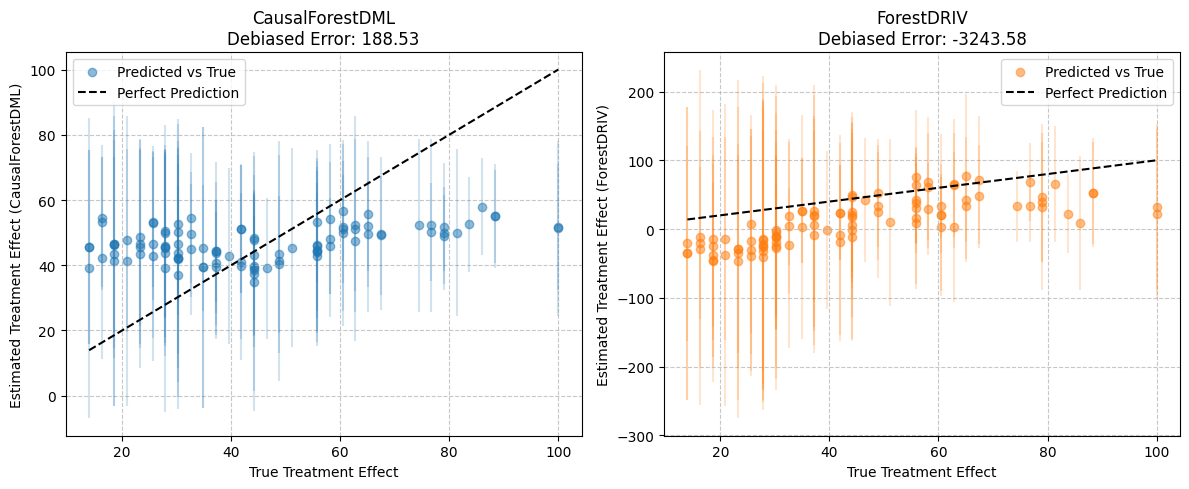

In [11]:
plt.figure(figsize=(12, 5))

# CausalForestDML Plot
plt.subplot(1, 2, 1)
plt.scatter(tau_new, dml_effects_new, alpha=0.5, label='Predicted vs True', color='#1f77b4')
plt.errorbar(tau_new, dml_effects_new, yerr=(dml_ub_new - dml_lb_new) / 2, fmt='none', alpha=0.2, color='#1f77b4')
plt.plot([tau_new.min(), tau_new.max()], [tau_new.min(), tau_new.max()], 'k--', label='Perfect Prediction')
plt.xlabel('True Treatment Effect')
plt.ylabel('Estimated Treatment Effect (CausalForestDML)')
plt.title(f'CausalForestDML\nDebiased Error: {dml_debiased_error:.2f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# ForestDRIV Plot
plt.subplot(1, 2, 2)
plt.scatter(tau_new, driv_effects_new, alpha=0.5, label='Predicted vs True', color='#ff7f0e')
plt.errorbar(tau_new, driv_effects_new, yerr=(driv_ub_new - driv_lb_new) / 2, fmt='none', alpha=0.2, color='#ff7f0e')
plt.plot([tau_new.min(), tau_new.max()], [tau_new.min(), tau_new.max()], 'k--', label='Perfect Prediction')
plt.xlabel('True Treatment Effect')
plt.ylabel('Estimated Treatment Effect (ForestDRIV)')
plt.title(f'ForestDRIV\nDebiased Error: {driv_debiased_error:.2f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Summary and Conclusion

Instrumental Forest is a powerful tool for estimating treatment effects in the presence of endogeneity, leveraging the strengths of random forests and instrumental variable analysis. It allows researchers to estimate heterogeneous treatment effects while addressing confounding issues, making it suitable for various applications in causal inference. This tutorial provided a step-by-step guide to implementing an Instrumental Forest using the `{grf}` package in R, demonstrating how to estimate treatment effects in a simulated scenario with a hypothetical surgical intervention and an instrument. At end of the tutorial, we summarized the results, including the average treatment effect and a comparison of true vs. estimated treatment effects. The code can be adapted to real-world datasets with appropriate instruments and covariates.

## References

1.   [Athey, Susan, Julie Tibshirani, and Stefan Wager. "Generalized Random Forests." Annals of Statistics, 47(2), 2019](https://grf-labs.github.io/grf/reference/instrumental_forest.html)[ ](https://rdrr.io/cran/grf/man/instrumental_forest.html)

2.   [Chernozhukov, Victor, and Christian Hansen. "The reduced form: A simple approach to inference with weak instruments." Economics Letters, 100(1), 2008.](https://github.com/grf-labs/grf/issues/501)

3.  [Wang, Guihua, et al. "An Instrumental Variable Forest Approach for Detecting Heterogeneous Treatment Effects in Observational Studies." Management Science, 2021](https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2021.4084)